Vamos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:
library(tidyverse)
library(stats)
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.4
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::

In [2]:

airbnb0<-read.csv("airbnb-listings.csv",sep = ";", stringsAsFactors = T)

#airbnb0<-read.csv('C:\\users\\evaes\\Downloads\\airbnb-listings.csv',sep = ';', stringsAsFactors = T)



In [3]:
airbnb<-airbnb0


Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [4]:
airbnb<- airbnb %>% select('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')
dim(airbnb)

[1] 14780    14

In [5]:
summary(airbnb)

        City                 Room.Type        Neighbourhood   Accommodates   
 Madrid   :13207   Entire home/apt:8976              :5229   Min.   : 1.000  
 Barcelona:  292   Private room   :5595   MalasaÃ±a  : 895   1st Qu.: 2.000  
 London   :  132   Shared room    : 209   La Latina  : 810   Median : 3.000  
 Paris    :  108                          Embajadores: 795   Mean   : 3.278  
 é©¬å¾·é‡Œ:   52                          Sol        : 716   3rd Qu.: 4.000  
 Palma    :   49                          Justicia   : 559   Max.   :16.000  
 (Other)  :  940                          (Other)    :5776                   
   Bathrooms        Bedrooms           Beds            Price       
 Min.   :0.000   Min.   : 0.000   Min.   : 1.000   Min.   :  9.00  
 1st Qu.:1.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 34.00  
 Median :1.000   Median : 1.000   Median : 2.000   Median : 55.00  
 Mean   :1.282   Mean   : 1.344   Mean   : 2.044   Mean   : 73.56  
 3rd Qu.:1.000   3rd Qu.: 2.000   3r

Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [6]:
df_madrid<- airbnb %>%
filter(City== "Madrid" & Room.Type=="Entire home/apt" & Neighbourhood != "")%>%
select(!("Room.Type"|"City"))

dim(df_madrid)
#head(df_madrid)


[1] 5601   12

Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [7]:
df_madrid<-df_madrid %>%
mutate(Square.Meters= Square.Feet*0.092903)
summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 MalasaÃ±a  : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 10.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 237.0   Median : 2.000  
 Mean   : 2.393   Mean   : 88.74   Mean   : 392.6   Mean   : 1.952  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

In [8]:
#algunos caracteres de neighbourhood no están bien, aprovecho y arreglo el encoding:
df_madrid$Neighbourhood<-as.character(df_madrid$Neighbourhood)
Encoding(df_madrid$Neighbourhood)="UTF-8"


In [9]:
df_madrid$Neighbourhood<-as.factor(df_madrid$Neighbourhood)
summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 10.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 237.0   Median : 2.000  
 Mean   : 2.393   Mean   : 88.74   Mean   : 392.6   Mean   : 1.952  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

In [10]:
# Esta casilla solo se ejecuta si la versión de dplyr lo permite

#intercambio las posiciones de square.feet y square.meters

df_madrid<-df_madrid %>% 
relocate(Square.Meters, .after = Price) %>%
relocate(Square.Feet, .after = last_col()) 

#packageVersion("dplyr")
#update.packages("dplyr")
#packUrl<-'https://cran.r-project.org/src/contrib/dplyr_1.0.5.tar.gz'
#install.packages(packUrl, repos= NULL, type= 'source')

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [11]:
df_madrid%>%
count(Square.Meters=='NA') %>%
mutate(pct = n / sum(n) * 100) 

paste('El porcentaje de apartamentos que no muestra los metros cuadrados es 93,8%. Son 5254 apartamentos')


"Square.Meters == ""NA""",n,pct
FALSE,347,6.195322
NA,5254,93.804678


[1] "El porcentaje de apartamentos que no muestra los metros cuadrados es 93,8%. Son 5254 apartamentos"

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [12]:
df_madrid%>%
filter(Square.Meters!='NA')%>%
count(Square.Meters=='0') %>%
mutate(pct = n / sum(n) * 100) 

paste('Los apartamentos que no tienen NA en los metros cuadrados son 347 como veíamos antes, de los cuales 128 tienen 0 metros cuadrados y esto supone un 36.88% del total de apartamentos.')

"Square.Meters == ""0""",n,pct
FALSE,219,63.11239
TRUE,128,36.88761


[1] "Los apartamentos que no tienen NA en los metros cuadrados son 347 como veíamos antes, de los cuales 128 tienen 0 metros cuadrados y esto supone un 36.88% del total de apartamentos."

Reemplazar todos los 0m^2 por NA 

In [13]:
df_madrid<-df_madrid %>%
mutate(Square.Meters = na_if(Square.Meters, "0"))

In [14]:
#confirmo contando los NA. el valor actual es = a 128 + 5254
df_madrid%>%
count(Square.Meters=='NA') %>%
mutate(pct = n / sum(n) * 100) 

"Square.Meters == ""NA""",n,pct
FALSE,219,3.910016
NA,5382,96.089984


Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más, además crearemos una variable sintética nueva basada en la similitud entre barrios.

Warning message:
"Removed 5382 rows containing non-finite values (stat_bin)."

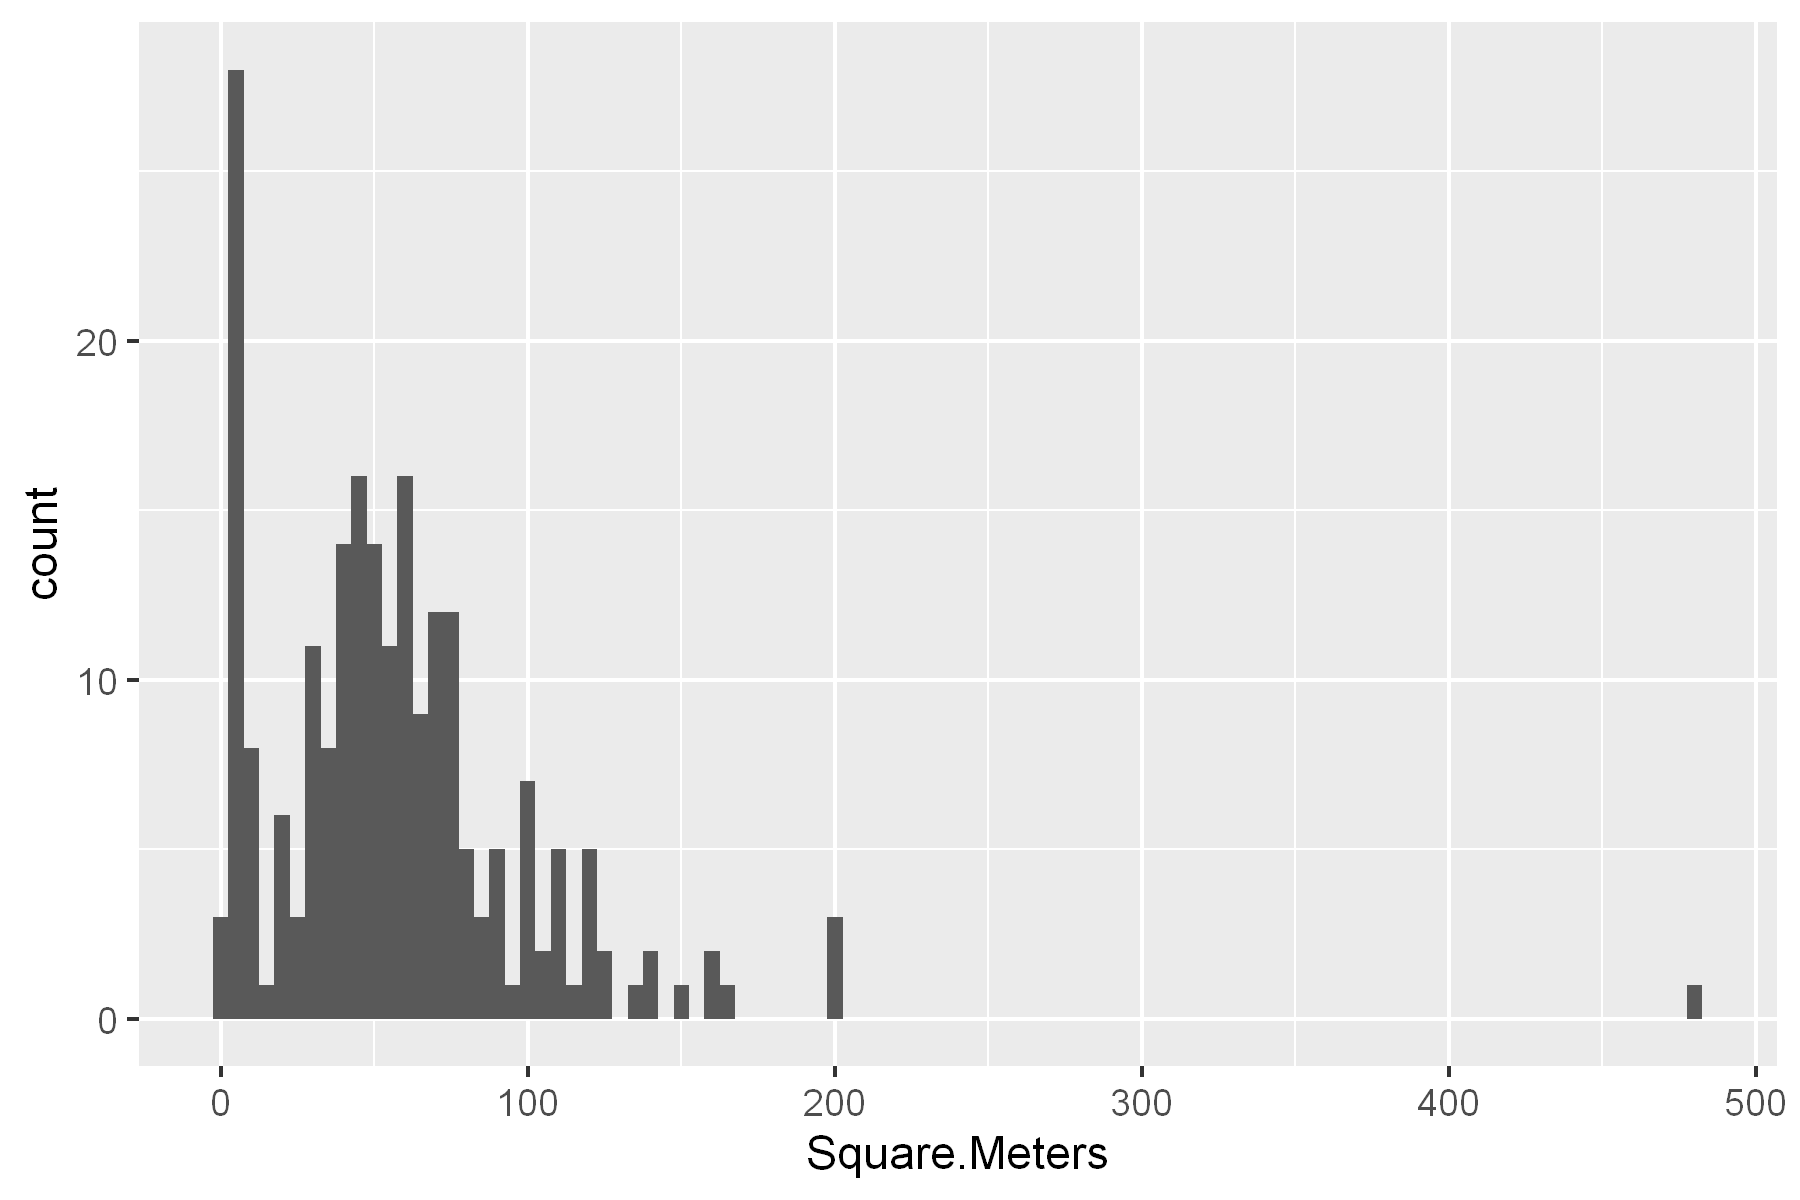

In [15]:
ggplot(data = df_madrid) +
  geom_histogram(mapping = aes(x = Square.Meters), binwidth = 5)

#ggplot(data = df_madrid) +
#geom_boxplot(mapping = aes(x = Square.Meters))

#q3<-quantile(df_madrid$Square.Meters,0.75, na.rm=T)
#q1<-quantile(df_madrid$Square.Meters,0.25, na.rm=T)
#iqr<-q3-q1
#paste('los outliers empezarían en: ',q3 + iqr, 'pero tengo tan pocos valores no-NA que los dejo')

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [16]:
#veo cuántos tengo de menos de 20 metros cuadrados
df_madrid %>% 
count(Square.Meters<20)


Square.Meters < 20,n
FALSE,174
TRUE,45
NA,5382


In [17]:
#y cuántos hay mayores de 400
#df_madrid %>% 
#count(Square.Meters>400)

In [18]:
#los convierto a NA
df_madrid$Square.Meters[df_madrid$Square.Meters<20] <- NA
#df_madrid$Square.Meters[df_madrid$Square.Meters>400] <- NA

#confirmo que ya el mínimo de metros cuadrados está en 20 o más
summary(df_madrid)

#confirmo que la suma de na coincide con lo anterior (5382) más 45
df_madrid %>% 
count(Square.Meters<20)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price        Square.Meters    Guests.Included 
 Min.   : 1.000   Min.   : 10.00   Min.   : 22.02   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.: 44.97   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 60.02   Median : 2.000  
 Mean   : 2.393   Mean   : 88.74   Mean   : 70.91   Mean   : 1.952  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 79.99   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

Square.Meters < 20,n
FALSE,174
NA,5427


Existen varios Barrios que todas sus entradas son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [19]:
#table(df_madrid$Neighbourhood,is.na(df_madrid$Square.Meters))

In [20]:

#barrios con todas las entradas na:
barrios_na<- df_madrid %>%
group_by(Neighbourhood) %>%
filter(all(is.na(Square.Meters)))%>%
arrange(Neighbourhood)

barrios_na$Neighbourhood<-as.factor(barrios_na$Neighbourhood)
barrios_na$Neighbourhood<-droplevels(barrios_na$Neighbourhood)
#compruebo los barrios que tienen todo NA
table(barrios_na$Neighbourhood,is.na(barrios_na$Square.Meters))
#cuento el número de barrios todo NA y el total
n_distinct(barrios_na$Neighbourhood)
n_distinct(df_madrid$Neighbourhood)


                     
                      TRUE
  Aluche                81
  Arganzuela             2
  Atocha                 5
  Bellas Vistas         27
  Berruguete            23
  Castillejos           35
  Delicias              25
  Estrella               4
  Fuencarral-el Pardo   27
  Fuencarral-El Pardo    2
  Gaztambide            40
  Guindalera            54
  Hispanoamérica        28
  Hortaleza             41
  Ibiza                 46
  Imperial              33
  La Chopera            22
  Legazpi               12
  Moncloa               14
  Nueva España          26
  Prosperidad           39
  Puente de Vallecas    47
  Tetuán                 3
  Valdeacederas         18
  Vallehermosa          18
  Villa de Vallecas     12
  Villaverde            16

[1] 27

[1] 65

In [21]:
#compruebo dimensiones de todos los barrios y barrios que todo son NA
dim(df_madrid)
dim(barrios_na)

[1] 5601   13

[1] 700  13

In [22]:
#dejo el dataframe sin barrios que todo son NA en los metros cuadrados
df_madrid<-df_madrid %>%
#barrios_sin_na<- df_madrid %>%
group_by(Neighbourhood) %>%
filter(!all(is.na(Square.Meters)))%>%
arrange(Neighbourhood)


In [23]:
#confirmo que me encajan las dimensiones (5601 observaciones menos 700 dan este resultado)
dim(df_madrid)


[1] 4901   13

In [24]:
#confirmo que no me quedan barrios con todo NA

df_madrid$Neighbourhood<-droplevels(df_madrid$Neighbourhood)
table(df_madrid$Neighbourhood,is.na(df_madrid$Square.Meters))
#y cuento el número de barrios que me quedan: 65-27
n_distinct(df_madrid$Neighbourhood)

                  
                   FALSE TRUE
  Acacias              3   30
  Adelfas              1   25
  Almagro              1   74
  Almenara             5   15
  Arapiles             2   64
  Argüelles            3  115
  Barajas              1   10
  Carabanchel          3   73
  Castellana           3   48
  Castilla             3   14
  Centro               1   12
  Chamberí             1   13
  Ciudad Jardin        1   17
  Ciudad Lineal        2   74
  Cortes               9  432
  Cuatro Caminos       2   43
  El Tréntaiseis       1    9
  El Viso              1   17
  Embajadores         20  565
  Fuente del Berro     1   32
  Goya                 2  106
  Jerónimos            2   31
  Justicia             8  376
  La Latina           20  551
  Lista                2   45
  Malasaña            26  653
  Moratalaz            1   14
  Pacifico             2   42
  Palacio              5  289
  Palos do Moguer      2   92
  Recoletos            2   92
  Retiro             

[1] 38

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

Warning message:
"package 'reshape2' was built under R version 3.6.3"
Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



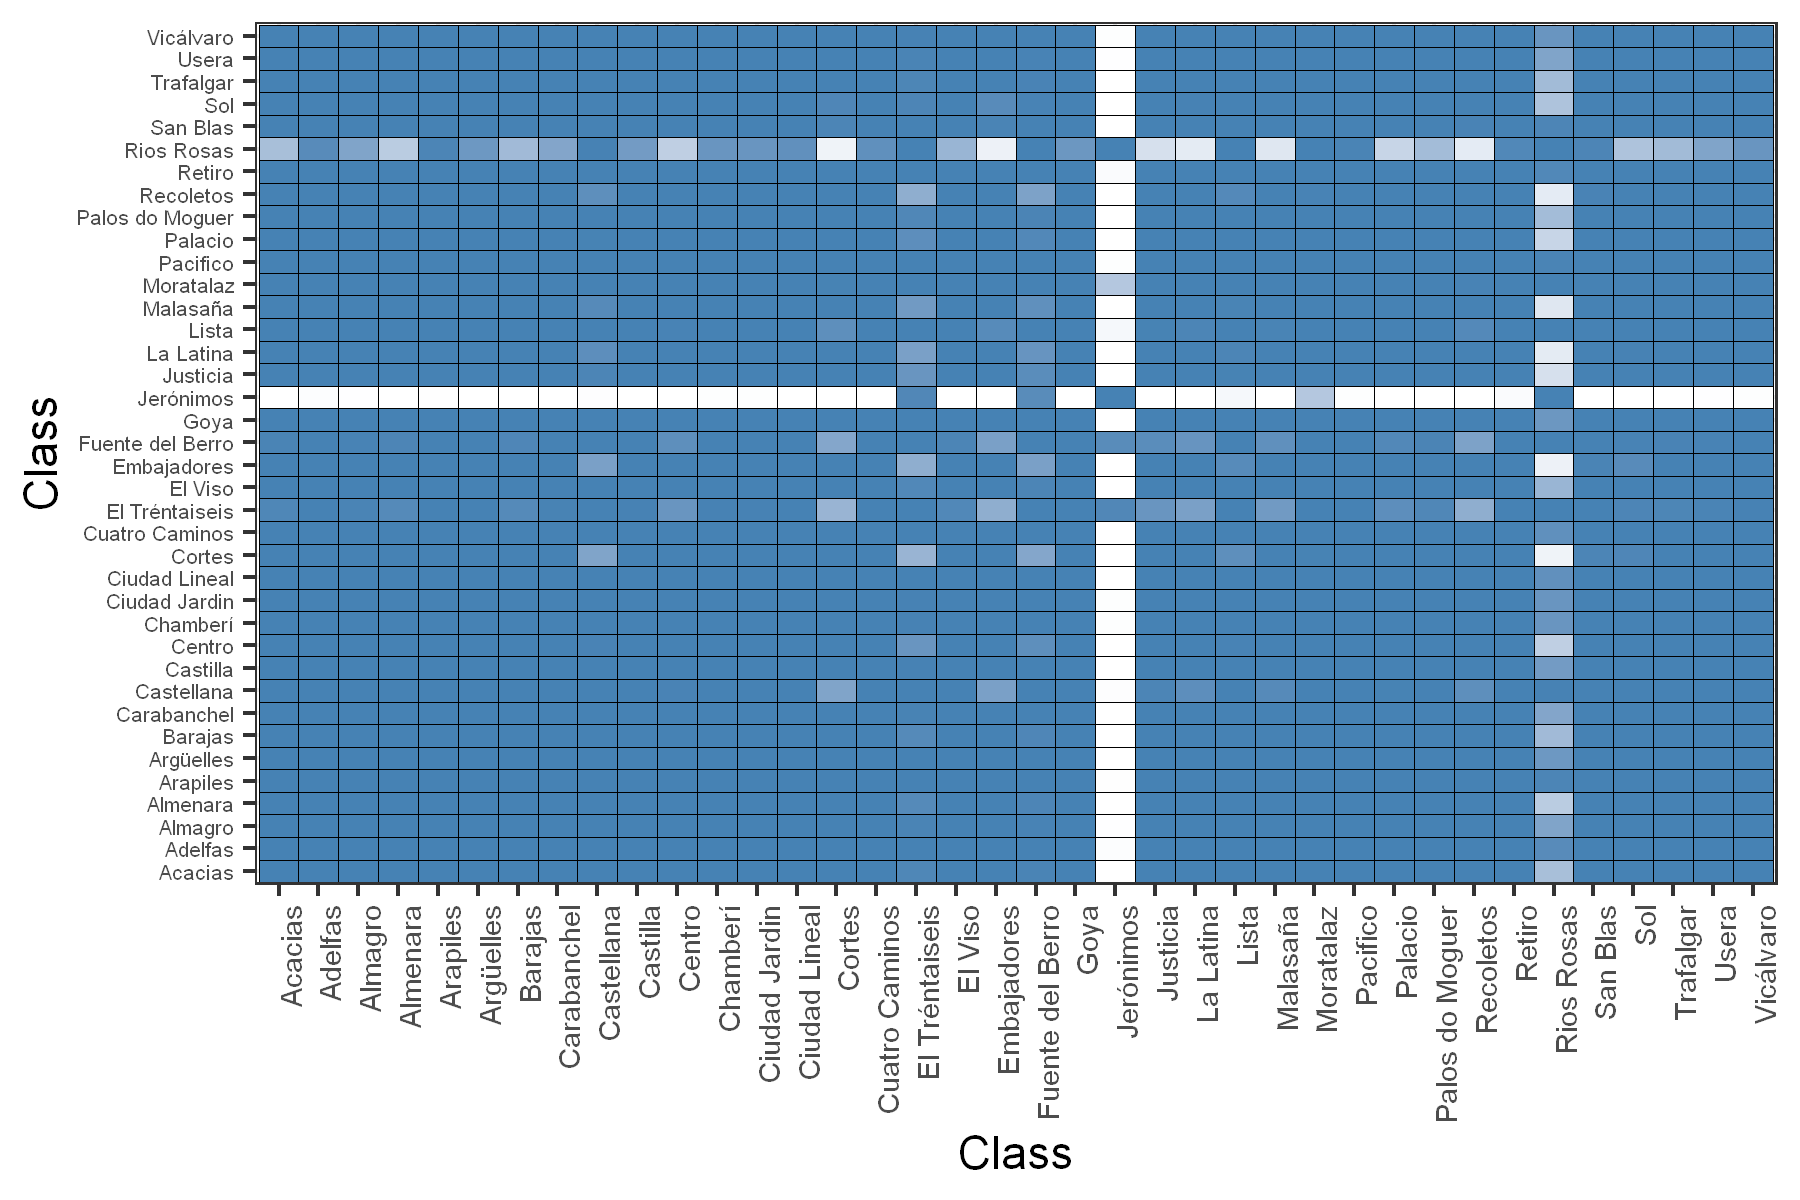

In [25]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1,size=7),axis.text.y = element_text(size = 5),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [26]:
#install.packages('dendextend')
suppressWarnings(library(dendextend))
#packageVersion("dendextend")
library(cluster)


---------------------
Welcome to dendextend version 1.14.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: 'dendextend'

The following object is masked from 'package:stats':

    cutree



In [27]:
#d1<-1-resm
#d1
#resm
#head(resm)

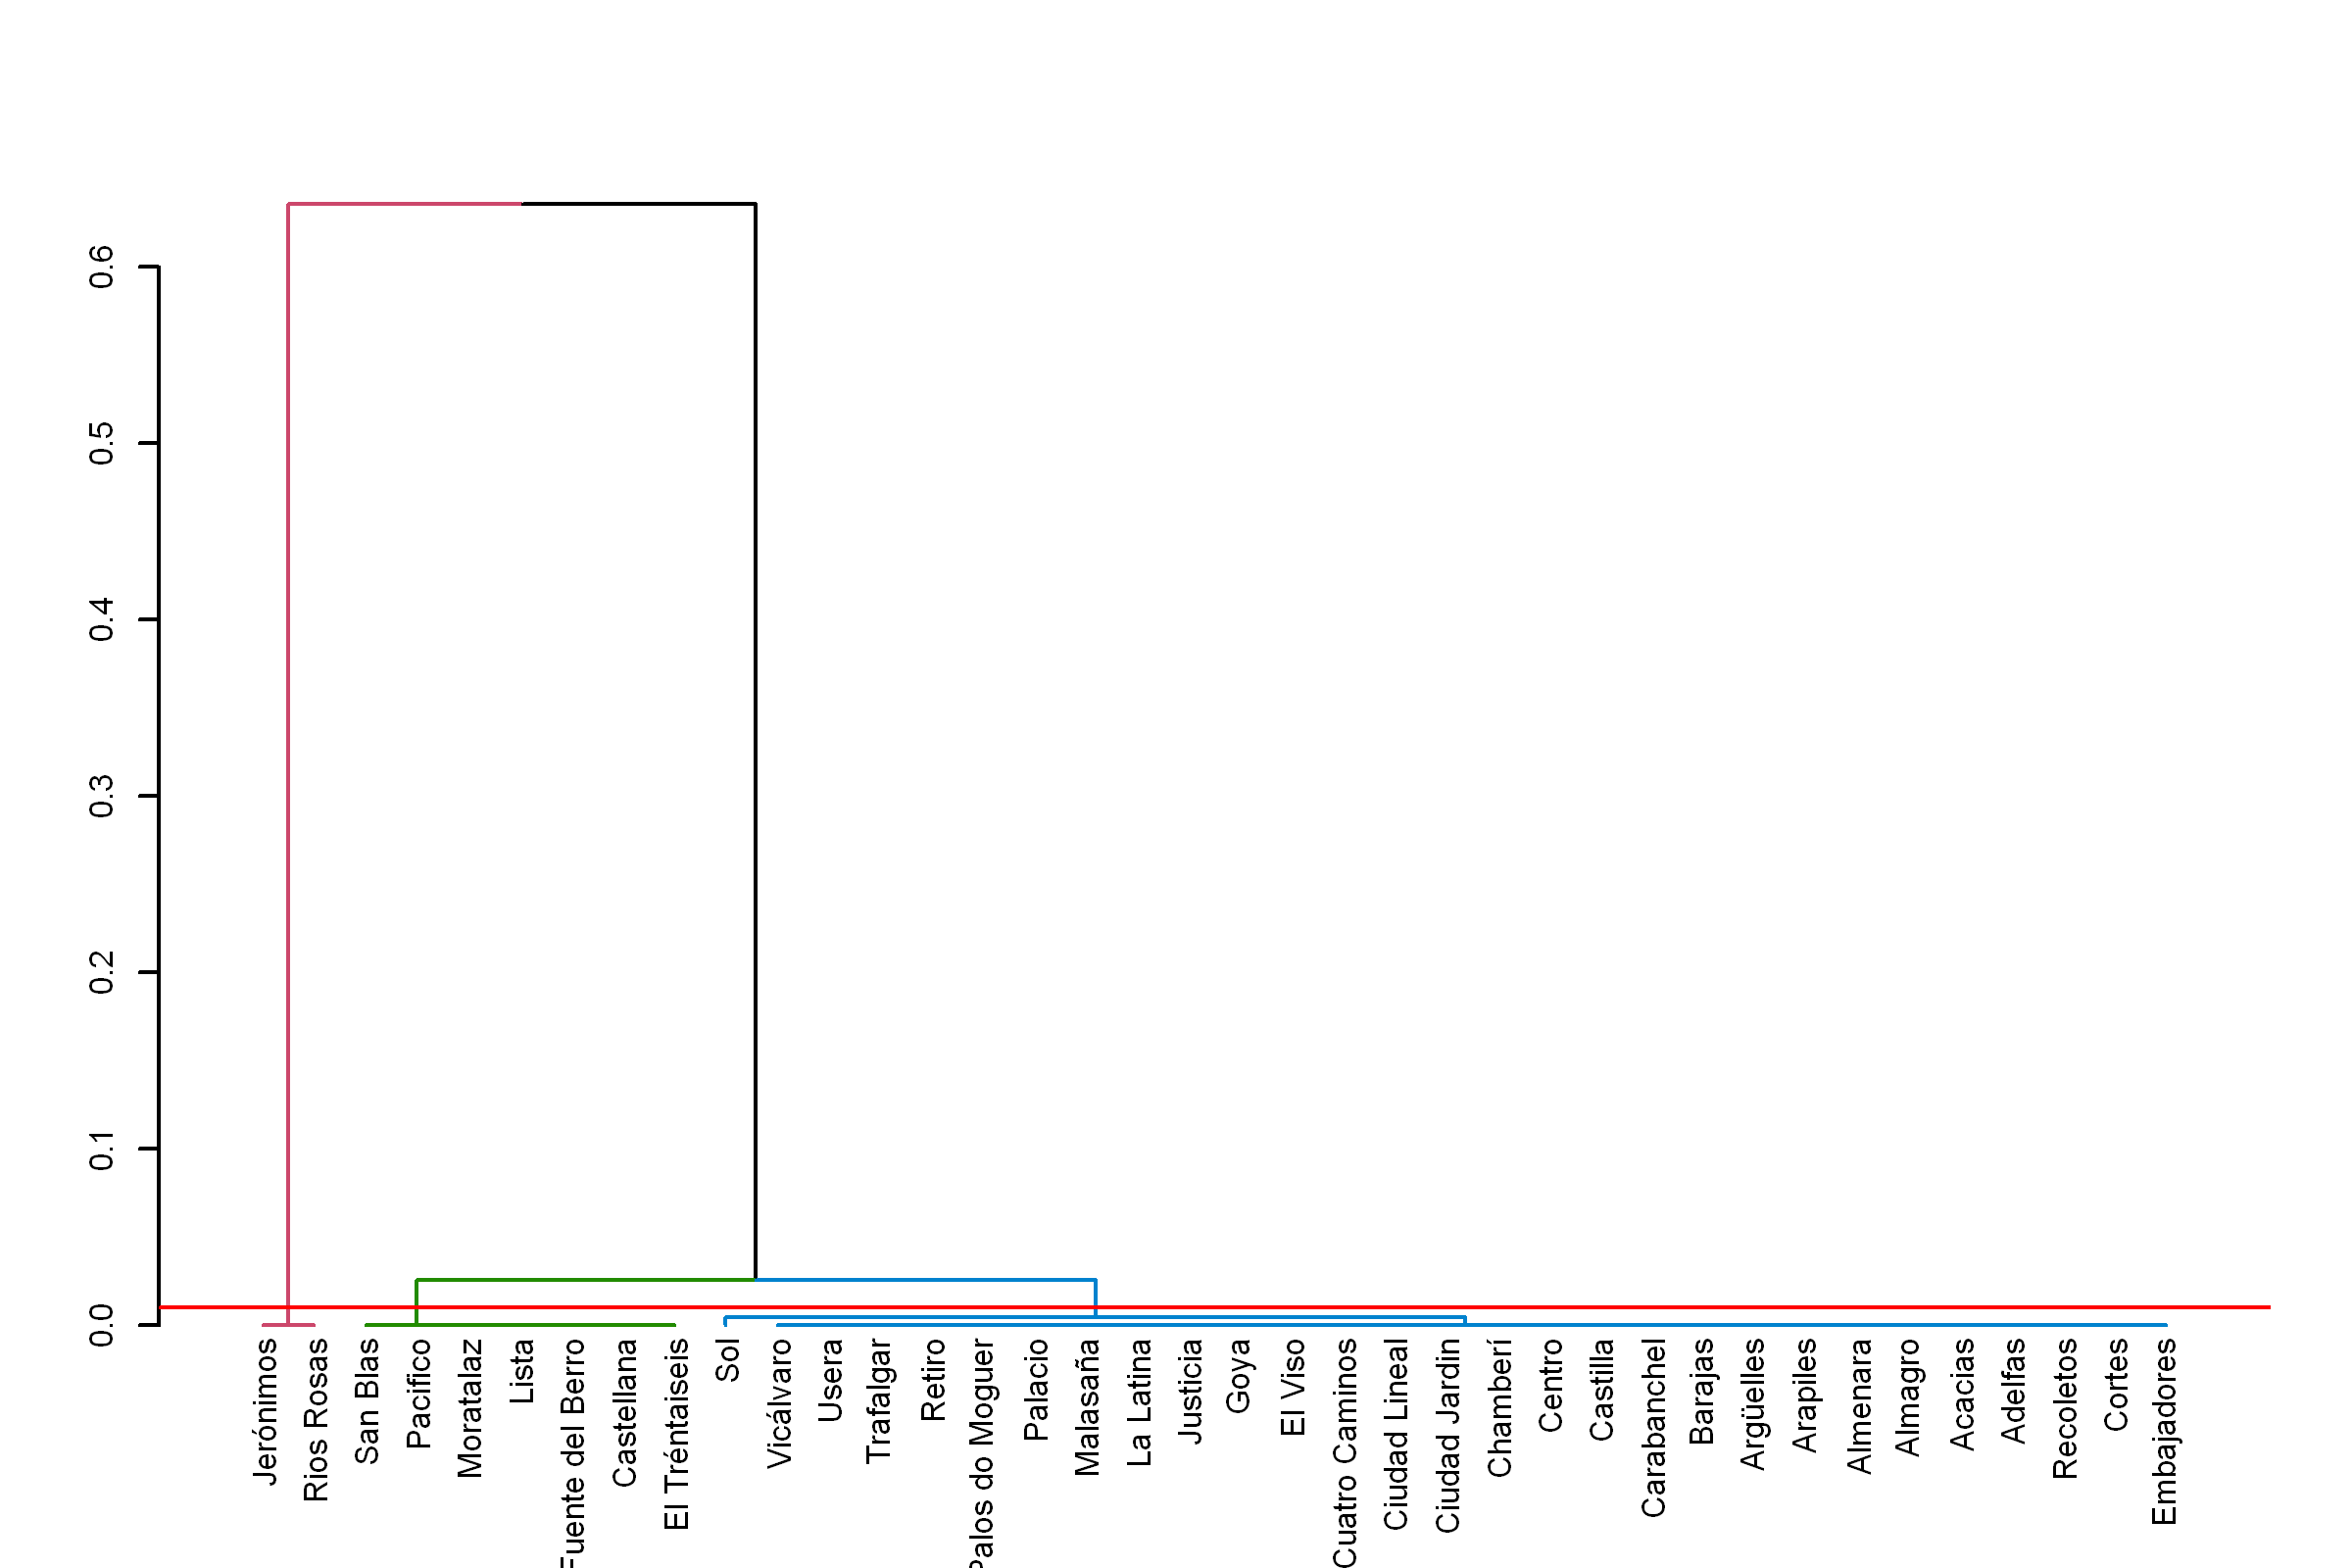

In [28]:
d<-as.dist(1-resm)
hc<-hclust(d,method='average')
hcd<-as.dendrogram(hc)
par(cex=0.5)
plot(color_branches(hcd,h=0.01),horiz=F)
abline(h=0.01,col="red")
options(repr.plot.height=4,repr.plot.width=8,repr.plot.res =400)

In [29]:
cl<-cutree_1h.dendrogram(hcd,h=0.01)
#cl<-cutree(hcd,h=0.01)


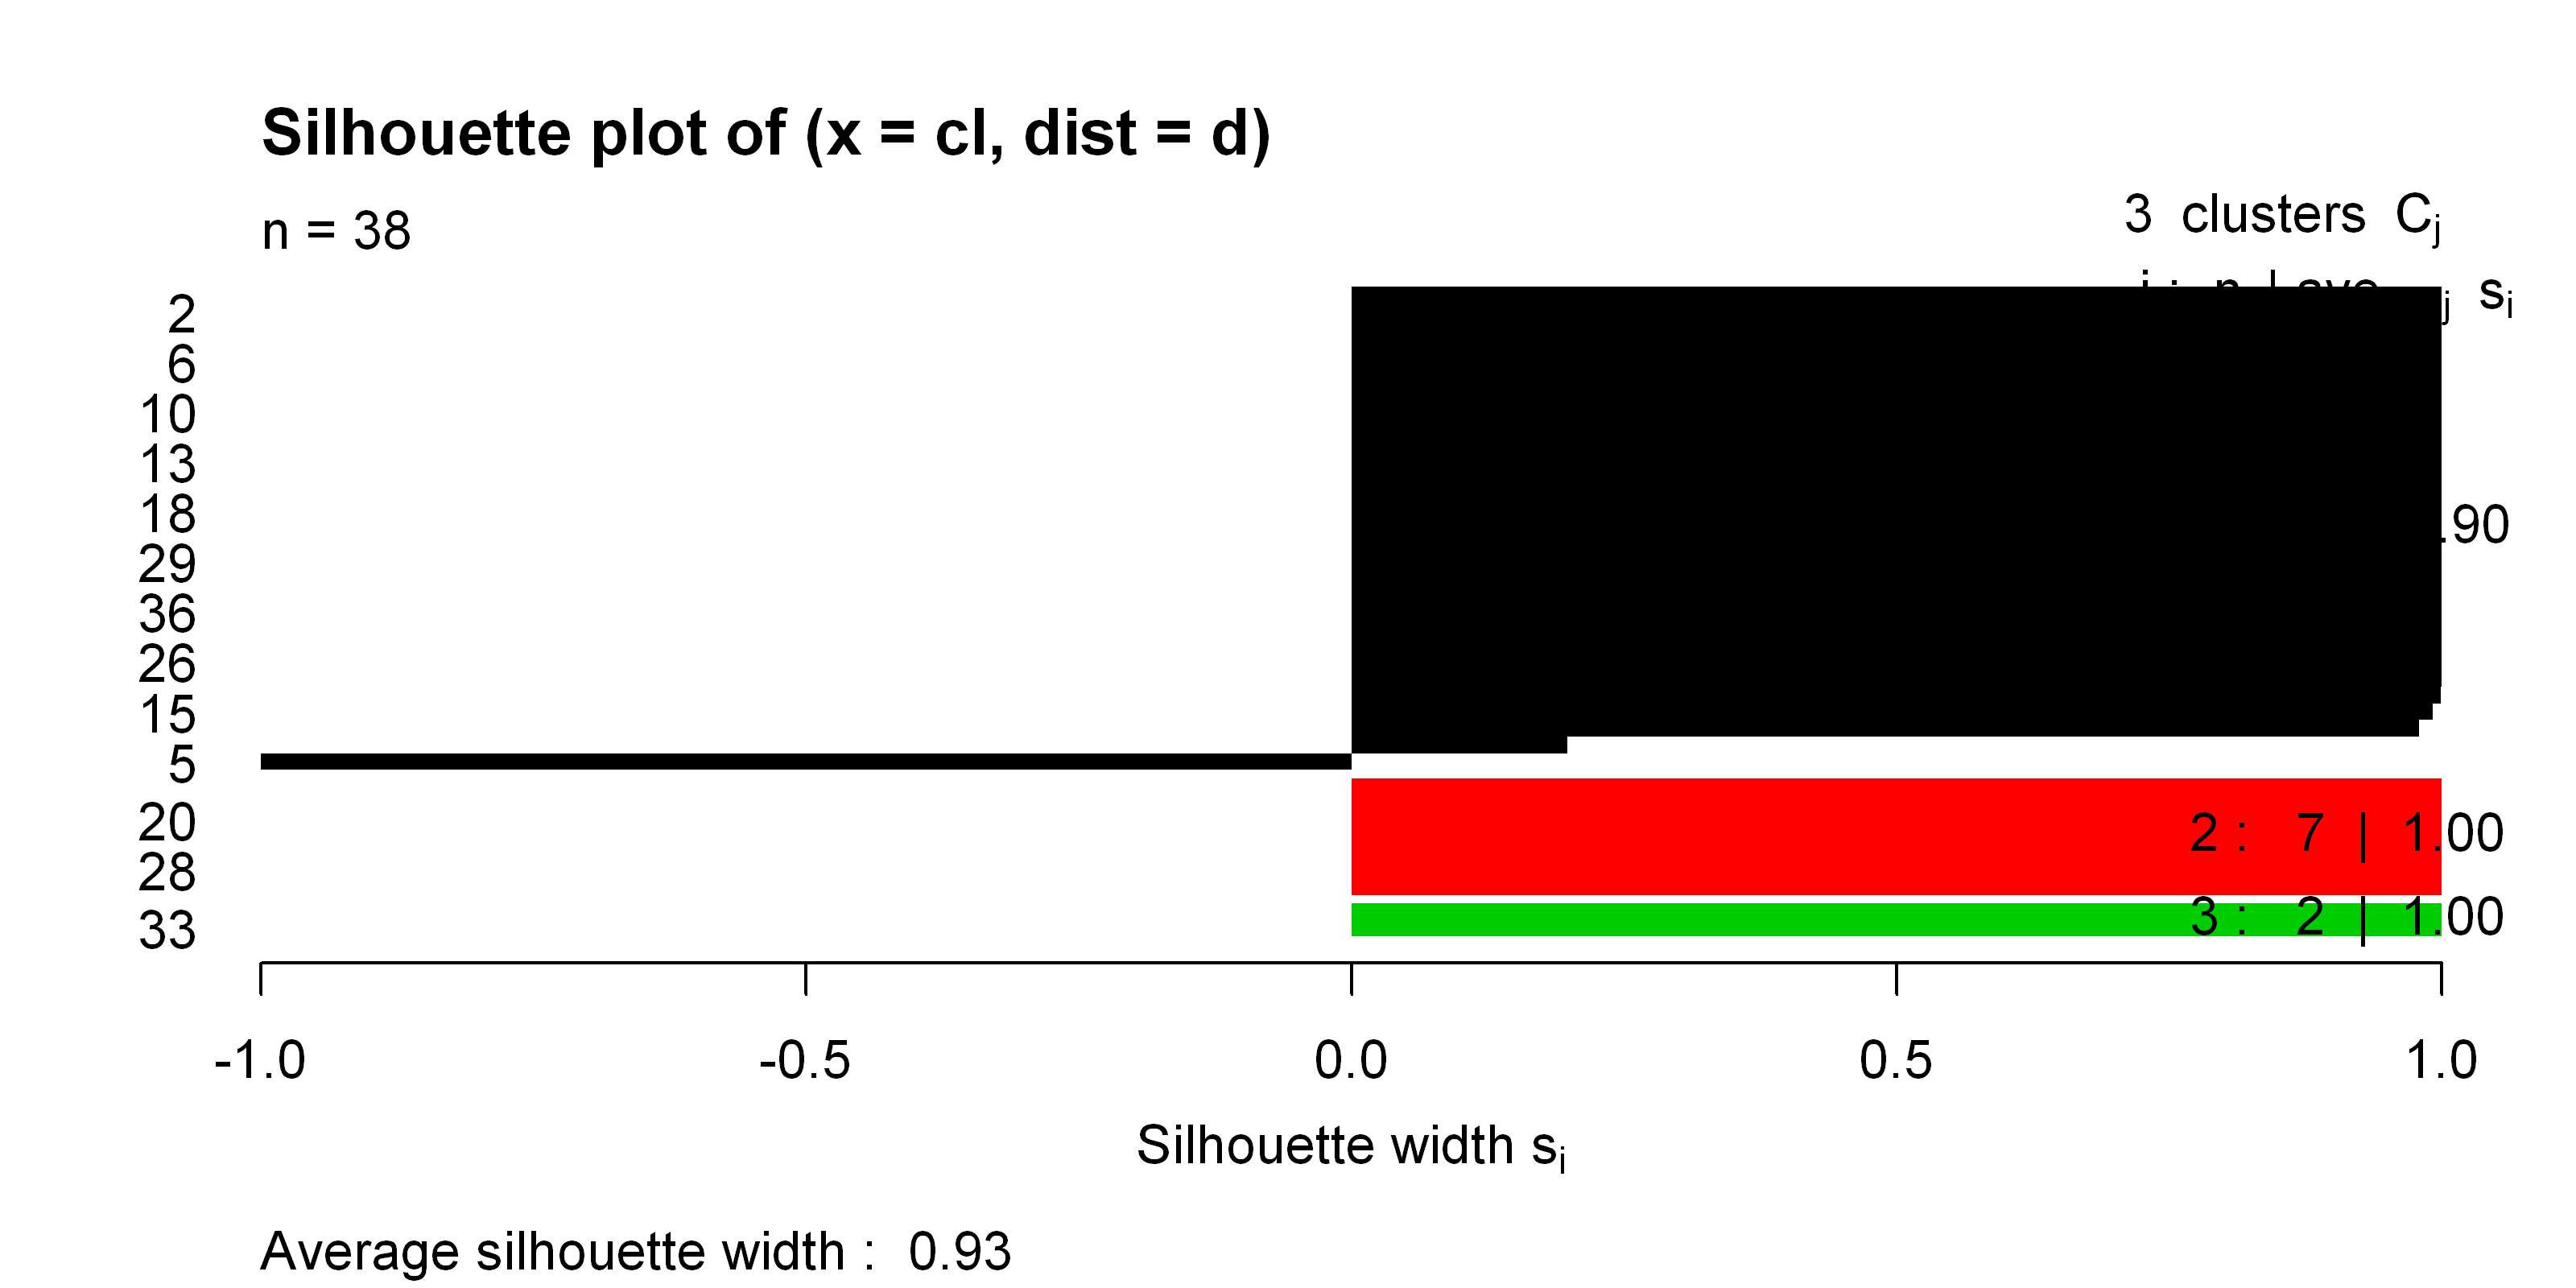

In [30]:
#df_madrid

ss<-silhouette(cl, d)
plot(ss,col=1:max(cl),border=NA)

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

In [165]:
names(cl[cl==1])
names(cl[cl==2])
names(cl[cl==3])

paste('El punto de corte lo pongo en 0.01 tras varias pruebas con diferentes métodos y cortes, confirmo con el silhouette que obtengo un valor muy alto, lo cual me dice que los clusters pueden ser acertados para la agrupación. Aparecen 3 clusters')

[1] "Acacias"         "Adelfas"         "Almagro"         "Almenara"       
 [5] "Arapiles"        "Argüelles"       "Barajas"         "Carabanchel"    
 [9] "Castilla"        "Centro"          "Chamberí"        "Ciudad Jardin"  
[13] "Ciudad Lineal"   "Cortes"          "Cuatro Caminos"  "El Viso"        
[17] "Embajadores"     "Goya"            "Justicia"        "La Latina"      
[21] "Malasaña"        "Palacio"         "Palos do Moguer" "Recoletos"      
[25] "Retiro"          "Sol"             "Trafalgar"       "Usera"          
[29] "Vicálvaro"

[1] "Castellana"       "El Tréntaiseis"   "Fuente del Berro" "Lista"           
[5] "Moratalaz"        "Pacifico"         "San Blas"

[1] "Jerónimos"  "Rios Rosas"

[1] "El punto de corte lo pongo en 0.01 tras varias pruebas con diferentes métodos y cortes, confirmo con el silhouette que obtengo un valor muy alto, lo cual me dice que los clusters pueden ser acertados para la agrupación. Aparecen 3 clusters"

In [32]:
#levels(df_madrid$Neighbourhood)

In [33]:
#cut(hcd, h = 0.01)$lower
typeof(cl)
#cl
#dim(cl)
table(cl)



[1] "integer"

cl
 1  2  3 
29  7  2 

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [167]:
df=data.frame(Neighbourhood= levels(df_madrid$Neighbourhood),neighb_id=as.factor(cl))
head(df)

,Neighbourhood,neighb_id
Acacias,Acacias,1
Adelfas,Adelfas,1
Almagro,Almagro,1
Almenara,Almenara,1
Arapiles,Arapiles,1
Argüelles,Argüelles,1


In [35]:
df_madrid<- df_madrid %>% left_join(df,by = "Neighbourhood")
summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms    
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.00  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.00  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.00  
 Sol        : 536   Mean   : 4.091   Mean   :1.244   Mean   : 1.42  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.00  
 Justicia   : 384   Max.   :16.000   Max.   :6.000   Max.   :10.00  
 (Other)    :1705                    NA's   :14      NA's   :7      
      Beds            Price        Square.Meters    Guests.Included 
 Min.   : 1.000   Min.   : 18.00   Min.   : 22.02   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 59.00   1st Qu.: 44.97   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 60.02   Median : 2.000  
 Mean   : 2.366   Mean   : 90.39   Mean   : 70.91   Mean   : 1.954  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 79.99   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :800.00  

In [36]:
#colnames(df_madrid)
#%>% select(Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Meters,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,neighb_id),

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [37]:
#options(repr.plot.height=8,repr.plot.width=8,repr.plot.res = 300)
#suppressWarnings(library(GGally))

#ggpairs(df_madrid[,c('Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Meters','Guests.Included','Extra.People','Review.Scores.Rating','Latitude','Longitude','neighb_id')], 
 #      lower = list(continuous = wrap("points", alpha=0.3, size=0.1, color='blue')))+
 #    theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [38]:
#ggpairs(df_madrid[,c('Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Meters','Guests.Included','neighb_id')], 
 #      lower = list(continuous = wrap("points", alpha=0.3, size=0.1, color='blue')))+
  #   theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [39]:
idx <- sample(1:nrow(df_madrid), nrow(df_madrid)*0.7)
df_madrid.train <- df_madrid[idx,]
df_madrid.test <- df_madrid[-idx,]

In [40]:
dim(df_madrid.train)
dim(df_madrid.test)
#summary(df_madrid.train)
#summary(df_madrid.test)

[1] 3430   14

[1] 1471   14

In [115]:
#Tras varias pruebas con todo tipo de variantes (logaritmo,^2, más y menos variables,stepAIC, boxcox,cooks distance para quitar outliers,glmnet como herramienta previa para seleccionar variables, con Lasso..)  el modelo que finalmente selecciono es: 
model6 <- lm(df_madrid.train, formula=Square.Meters~ Accommodates+Bedrooms+neighb_id+Price)
summary(model6)
#model1 <- lm(df_madrid.train, formula=Square.Meters~.-Neighbourhood-Square.Feet)
#summary(model1)


Call:
lm(formula = Square.Meters ~ Accommodates + Bedrooms + neighb_id + 
    Price, data = df_madrid.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-105.975  -11.855   -1.203   12.047  141.511 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.27052    6.05268   0.540 0.589962    
Accommodates   7.45738    1.80898   4.122 6.94e-05 ***
Bedrooms      13.54015    3.97943   3.403 0.000908 ***
neighb_id2    21.33646   12.15902   1.755 0.081849 .  
neighb_id3   115.97068   17.08482   6.788 4.61e-10 ***
Price          0.08838    0.03639   2.429 0.016628 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 27.75 on 120 degrees of freedom
  (3304 observations deleted due to missingness)
Multiple R-squared:  0.7074,	Adjusted R-squared:  0.6952 
F-statistic: 58.01 on 5 and 120 DF,  p-value: < 2.2e-16


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  0.08838   4.31724  10.49876  26.94393  19.38738 115.97068 

In [80]:
# Encuentra el modelo con menor AIC pero no mejora la distribución de los errores...finalmente no lo sigo
#library(MASS)
#model_optim_aic<-stepAIC(model1, direction="both", trace=0)
#summary(model_optim_aic)

#prueba glmnet ,como herramienta previa para seleccionar variables, con lasso
#library(glmnet)
#df_madrid.train_na<-na.omit(df_madrid.train)
#cvfit<-cv.glmnet(as.matrix(df_madrid.train_na[,c('Accommodates','Bathrooms','Bedrooms','Beds','Price','Guests.Included','Extra.People','Review.Scores.Rating','Latitude','Longitude')]),as.matrix(df_madrid.train_na[,'Square.Meters']),nfolds=10,alpha=1,standardize=F)
#cvfit<-cv.glmnet(as.matrix(df_madrid.train_na[,c('Accommodates','Bathrooms','Bedrooms','Beds','Price')]),as.matrix(df_madrid.train_na[,'Square.Meters']),nfolds=5,alpha=1,standardize=F)
#cvfit<-cv.glmnet(as.matrix(df_madrid.train_na[,c('Accommodates','Bathrooms','Bedrooms','Beds','Price','Guests.Included','Extra.People','Review.Scores.Rating')]),as.matrix(df_madrid.train_na[,'Square.Meters']),nfolds=5,lambda=2,alpha=1,standardize=F)
#coef(cvfit, s = cvfit$lambda.1se)
#coef(cvfit, s = cvfit$lambda.min)
#cvfit$glmnet.fit$dev.ratio[which(cvfit$glmnet.fit$lambda == cvfit$lambda.min)] 
#reg_df_madrid_train <- predict(cvfit,df_madrid.train,s=cvfit$lambda.min)
#caret::postResample(reg_df_madrid_train,df_madrid.train$Square.Meters)
#plot(cvfit)
#fit<-glmnet(as.matrix(df_madrid.train_na[,c('Accommodates','Bathrooms','Bedrooms','Beds','Price','Guests.Included','Extra.People','Review.Scores.Rating')]),as.matrix(df_madrid.train_na[,'Square.Meters']),alpha=1, standardize=F)
#par(mfrow=c(1,3))
#plot(fit,label=TRUE)
#grid()
#plot(fit,label=TRUE,xvar="lambda")
#grid()
#plot(fit,label=TRUE,xvar="dev")
#grid()

#options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 200)
#plot(cooks.distance(model))
#df_madrid.train<-na.omit(df_madrid.train)
#df_madrid.train_clean<-df_madrid.train[cooks.distance(model)<2,]
#model_clean <- lm(df_madrid.train_clean, formula=Square.Meters~.-Extra.People-Longitude-Latitude-Bedrooms-Guests.Included-Price-Beds-pred)
#summary(model_clean)
#df_madrid.test$pred<-predict(model_clean,df_madrid.test)
#caret::postResample(df_madrid.test$pred, df_madrid.test$Square.Meters)


In [82]:
#model <- lm(df_madrid.train, formula=Square.Meters~ I(log(Accommodates))+Bedrooms+neighb_id+Price)
#summary(model)
#model3 <- lm(df_madrid.train, formula=Square.Meters~ Bathrooms+Bedrooms+ neighb_id+I(log(Price)))
#summary(model3)
#model4 <- lm(df_madrid.train, formula=Square.Meters~ Accommodates+Bathrooms+Bedrooms+ Guests.Included+ neighb_id+I(log(Price)))
#summary(model4)
#model5 <- lm(df_madrid.train, formula=Square.Meters~ I(log(Accommodates))+Bathrooms+  neighb_id+I(log(Price)))
#summary(model5)
#model1 <- lm(formula=Square.Meters~ Accommodates+Bathrooms+Bedrooms,data = df_madrid.train)
#summary(model1)
#model2 <- lm(formula=Square.Meters~ Bathrooms+Bedrooms+Beds,data = na.omit(df_madrid.train))
#summary(model2)

In [83]:
#ggplot(df_madrid.train,aes(x=Square.Meters,y=Accommodates+Bedrooms+Price))+geom_point()+geom_smooth(method='lm')


In [64]:
df_madrid.train$pred<-predict(model6,df_madrid.train)
sqrt(mean((df_madrid.train$Square.Meters-df_madrid.train$pred)^2,na.rm=T)) 
caret::postResample(pred=df_madrid.train$pred, obs=df_madrid.train$Square.Meters)

[1] 27.08533

RMSE  Rsquared       MAE 
       NA 0.7073522        NA

In [66]:
df_madrid.test$pred<-predict(model6,df_madrid.test)
sqrt(mean((df_madrid.test$Square.Meters-df_madrid.test$pred)^2,na.rm=T)) 
caret::postResample(df_madrid.test$pred, df_madrid.test$Square.Meters)

[1] 20.36841

RMSE  Rsquared       MAE 
       NA 0.6961803        NA

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

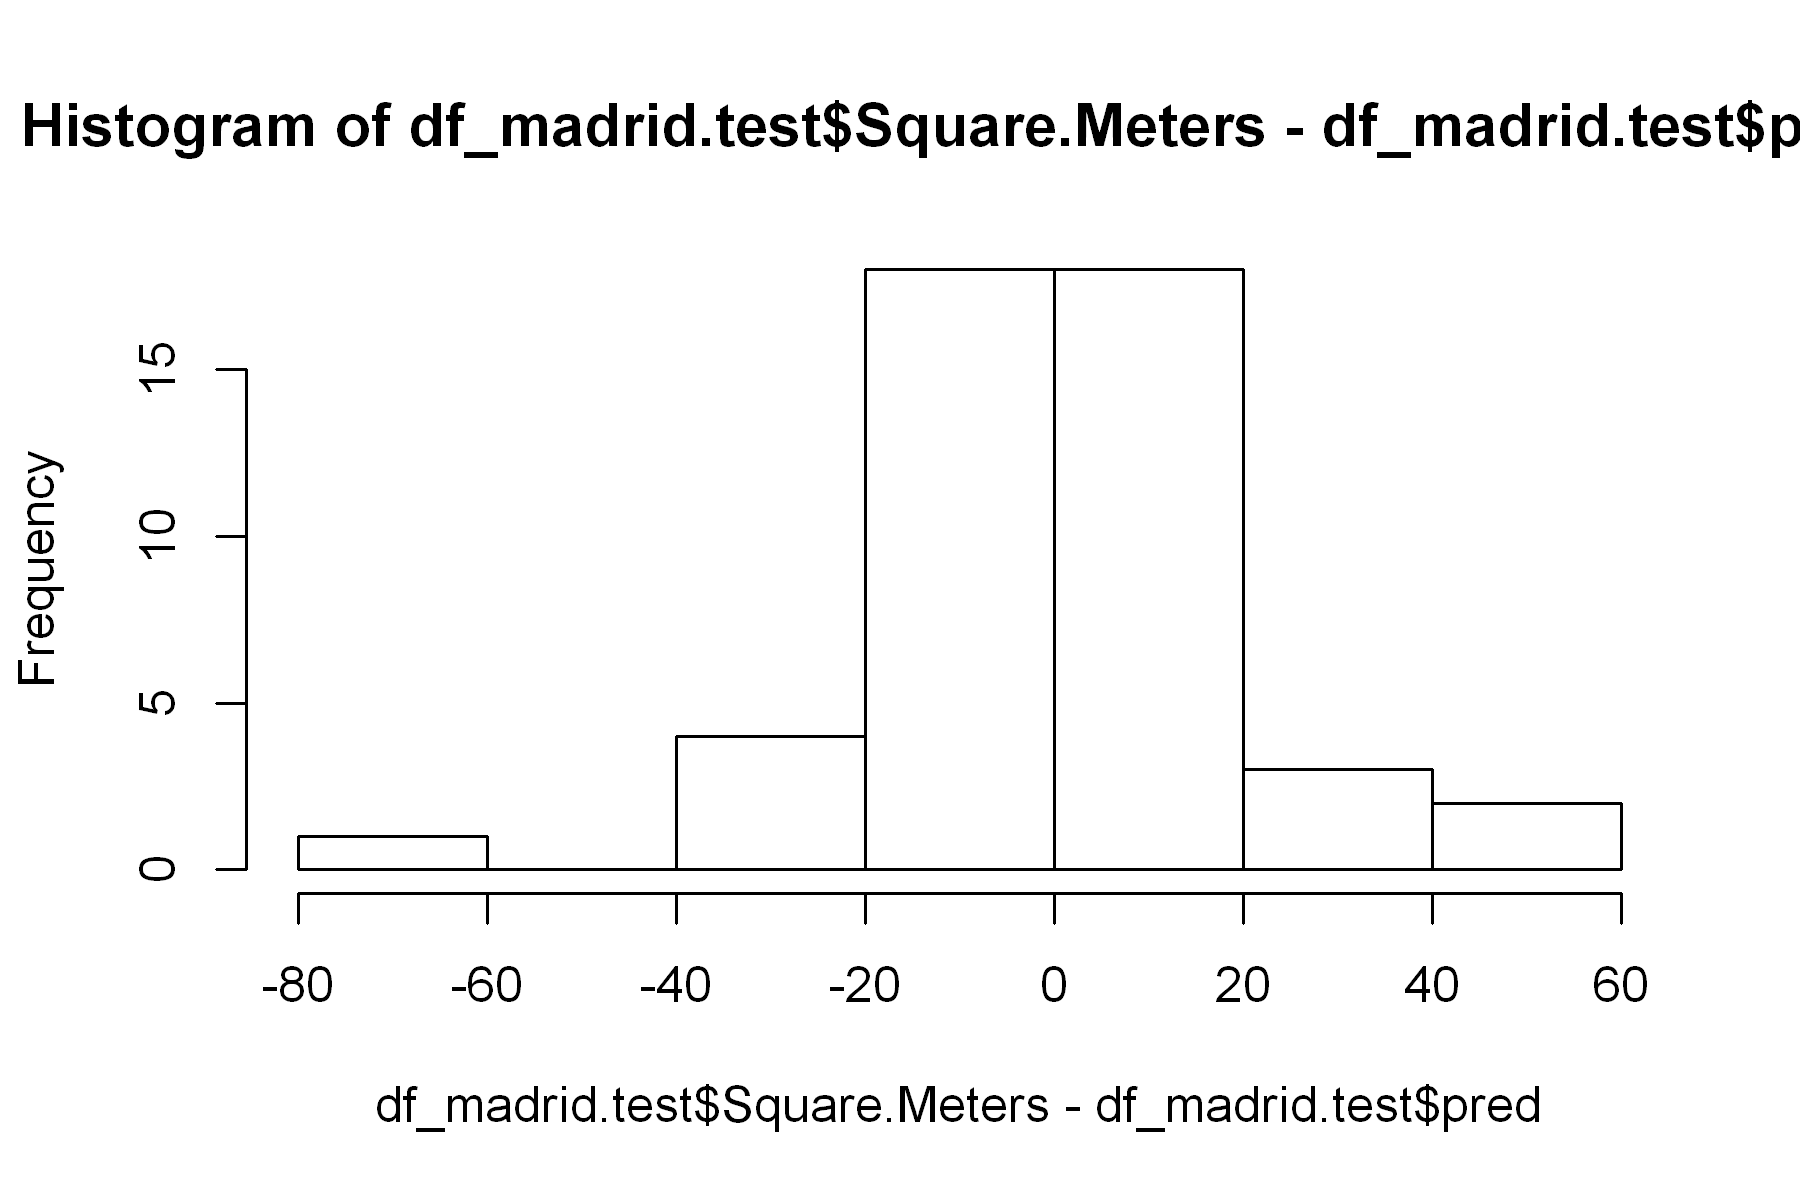

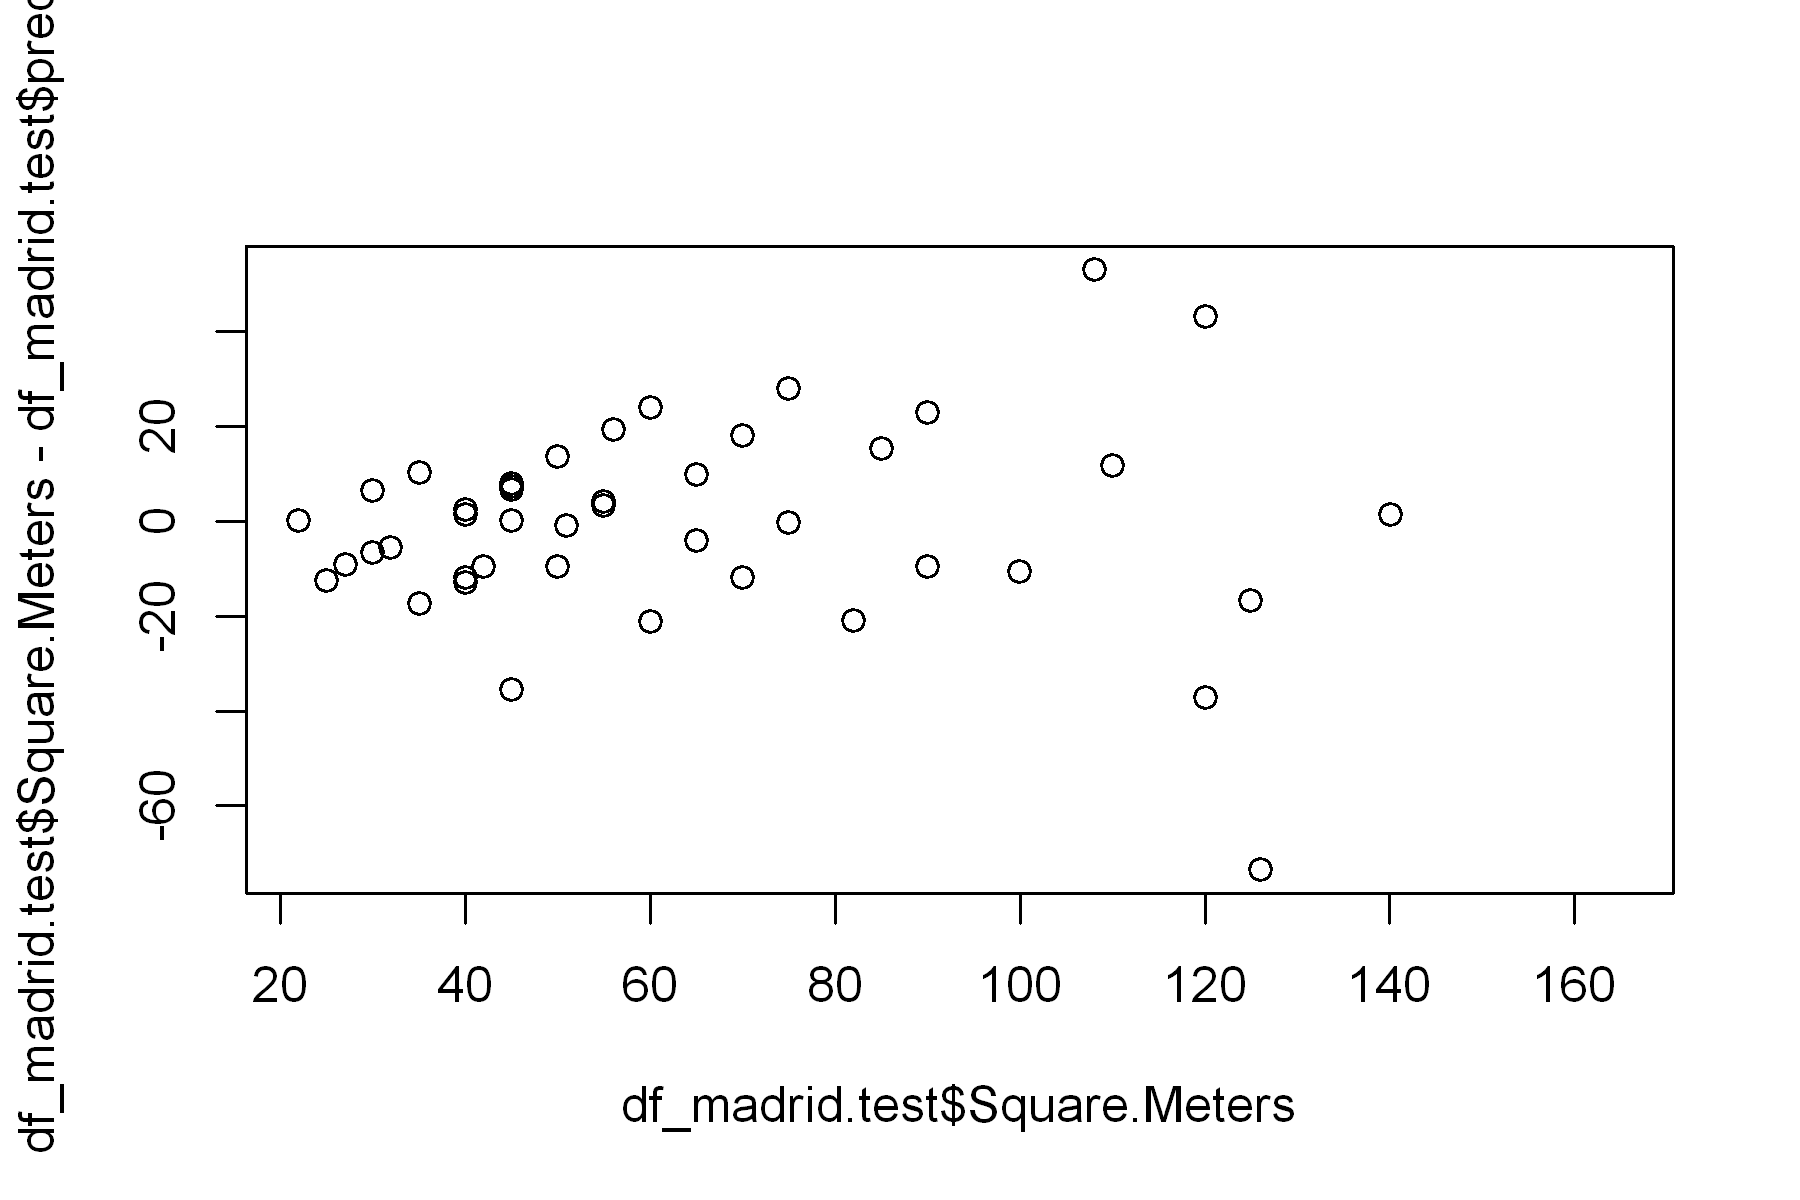

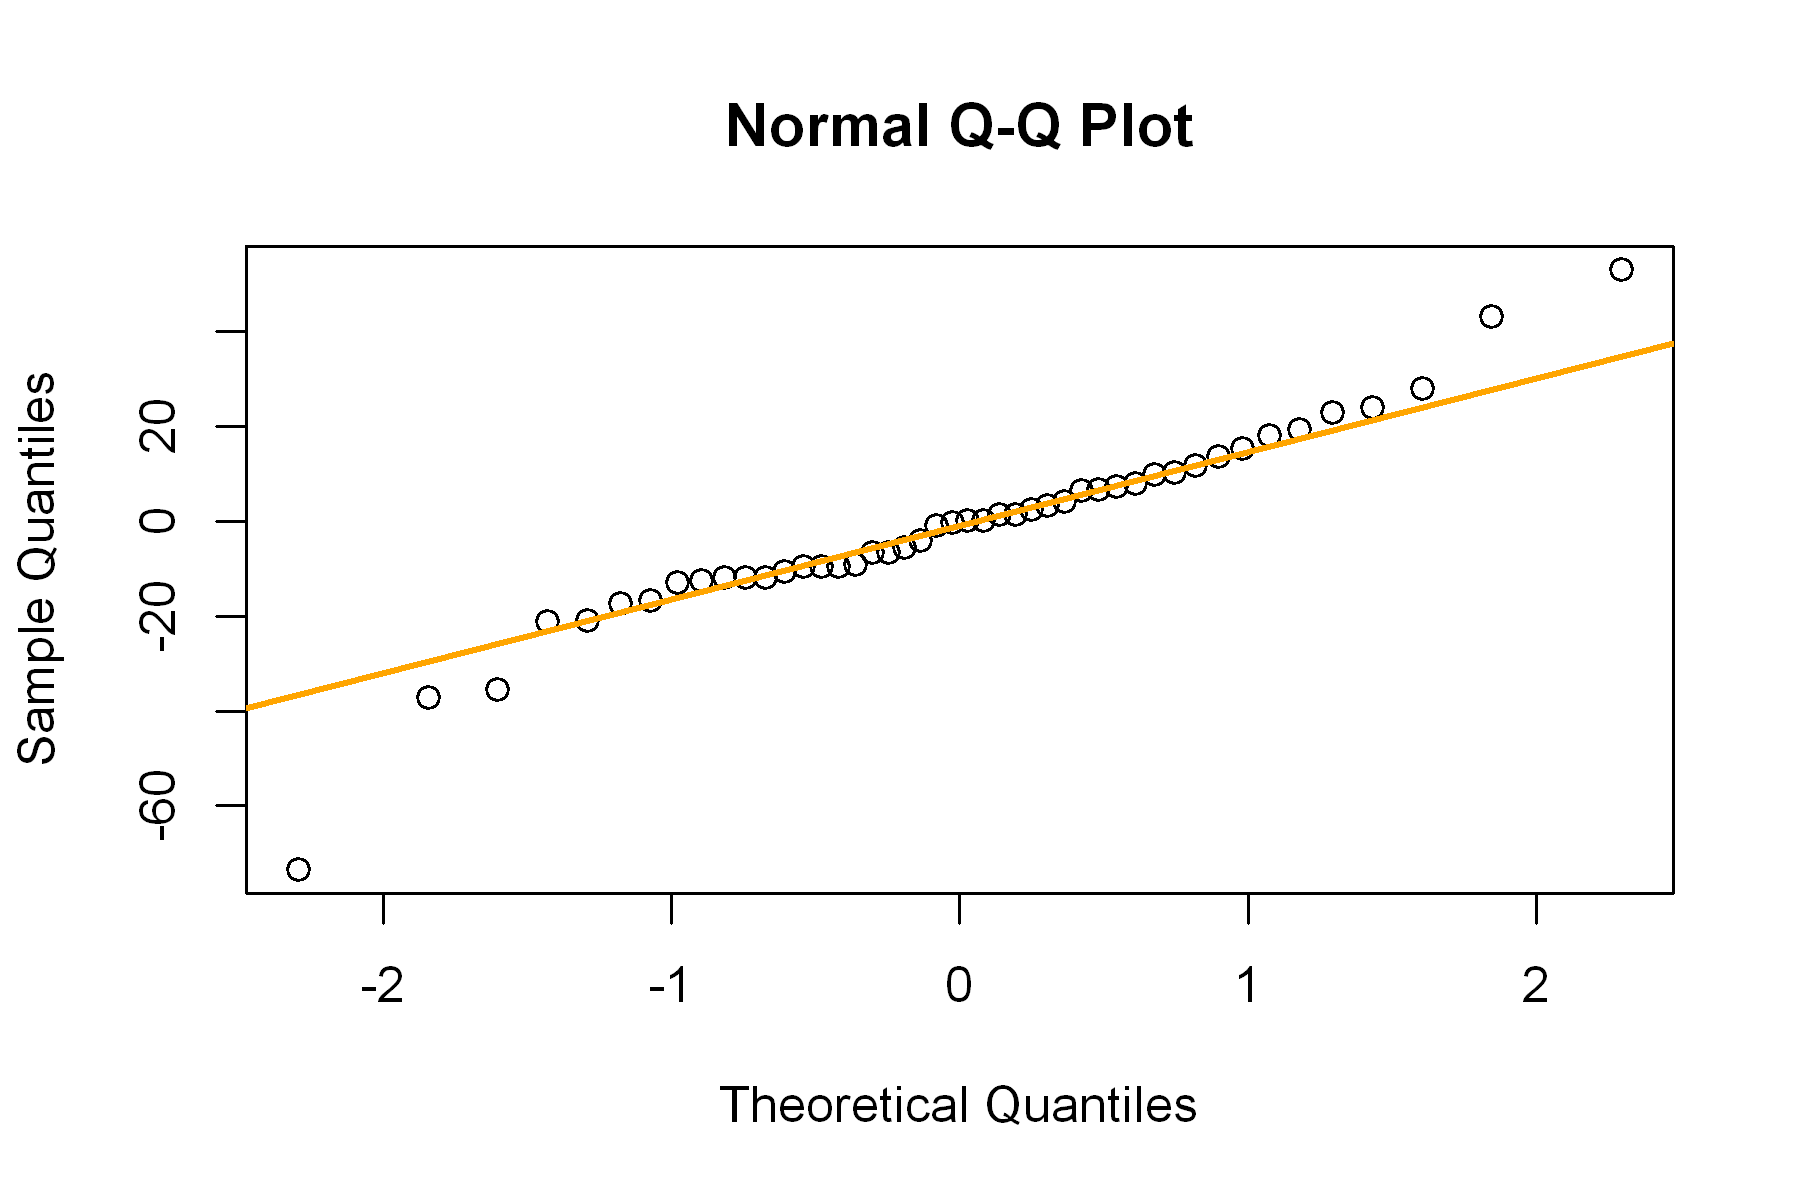

In [67]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)
hist(df_madrid.test$Square.Meters-df_madrid.test$pred)
plot(df_madrid.test$Square.Meters,df_madrid.test$Square.Meters-df_madrid.test$pred)
qqnorm(df_madrid.test$Square.Meters-df_madrid.test$pred)
qqline(df_madrid.test$Square.Meters-df_madrid.test$pred,col='orange',lwd=2)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

In [163]:
#summary(df_madrid.test)
#opción predict()
pred_sol<-data.frame(Accommodates=6,Bedrooms=3,Price=80,neighb_id='1')
pred_sol
pred_Square.Meters<-predict(model6,pred_sol)
pred_Square.Meters

#Compruebo con la función multiplicando según los coeficientes del modelo 
model6$coefficients
paste('los metros cuadrados esperados de un apartamento para 6 personas (Accommodates) con un precio de 80 euros/noche y 3 habitaciones en el barrio de Sol son: ', model6$coefficients[[1]]+ model6$coefficients[[2]]*6+ model6$coefficients[[3]]*3+model6$coefficients[[6]]*80)

paste('para calcular cómo varían los metros cuadrados por cada habitación adicional, teniendo en cuenta que el resto de variables permanecen igual, habría que multiplicar el coeficiente de Bedrooms',model6$coefficients[[3]],'por el número de habitaciones nuevo')



Accommodates,Bedrooms,Price,neighb_id
6,3,80,1


1 
95.70558

(Intercept) Accommodates     Bedrooms   neighb_id2   neighb_id3        Price 
  3.27052187   7.45738157  13.54014817  21.33646144 115.97067636   0.08837909

[1] "los metros cuadrados esperados de un apartamento para 6 personas (Accommodates) con un precio de 80\200/noche y 3 habitaciones en el barrio de Sol son:  95.7055830852854"

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [168]:
df_madrid.train %>% 
    mutate(Square.Meters = coalesce(Square.Meters,pred))->df_madrid.train1
df_madrid.test %>% 
    mutate(Square.Meters = coalesce(Square.Meters,pred))->df_madrid.test1
df_madrid.tot<-rbind(df_madrid.train1,df_madrid.test1)


head(df_madrid.tot)

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Meters,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Feet,neighb_id,pred
Embajadores,5,1,2,3,85,75.14995,3,15,93,40.41289,-3.700650,NA,1,75.14995
Lista,6,1,3,3,120,120.57721,1,0,93,40.43383,-3.675312,NA,2,120.57721
La Latina,6,1,2,3,85,82.60733,4,10,80,40.40776,-3.711027,NA,1,82.60733
Sol,3,1,2,3,105,62.00277,2,0,96,40.41566,-3.707624,NA,1,62.00277
Goya,5,1,2,2,105,76.91753,4,30,93,40.42408,-3.675718,NA,1,76.91753
Palacio,5,1,2,2,70,73.82426,2,15,96,40.41786,-3.709784,NA,1,73.82426


Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [314]:
#selecciono un apartamento
#set.seed(785)
df_apartment<-df_madrid.tot[sample(1:nrow(df_madrid.tot),1),c('Accommodates','Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Guests.Included', 'Extra.People', 'Review.Scores.Rating', 'Latitude', 'Longitude', 'Square.Meters')]
df_apartment                     
                         

Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
2,1,1,1,76,2,11,68,40.42115,-3.698723,38.44224


Importance of components:
                          PC1    PC2     PC3     PC4     PC5    PC6     PC7
Standard deviation     2.1604 1.2210 1.01702 0.95584 0.82682 0.7807 0.73445
Proportion of Variance 0.4243 0.1355 0.09403 0.08306 0.06215 0.0554 0.04904
Cumulative Proportion  0.4243 0.5598 0.65387 0.73693 0.79908 0.8545 0.90352
                           PC8     PC9    PC10    PC11
Standard deviation     0.68554 0.52222 0.44691 0.34477
Proportion of Variance 0.04272 0.02479 0.01816 0.01081
Cumulative Proportion  0.94624 0.97104 0.98919 1.00000

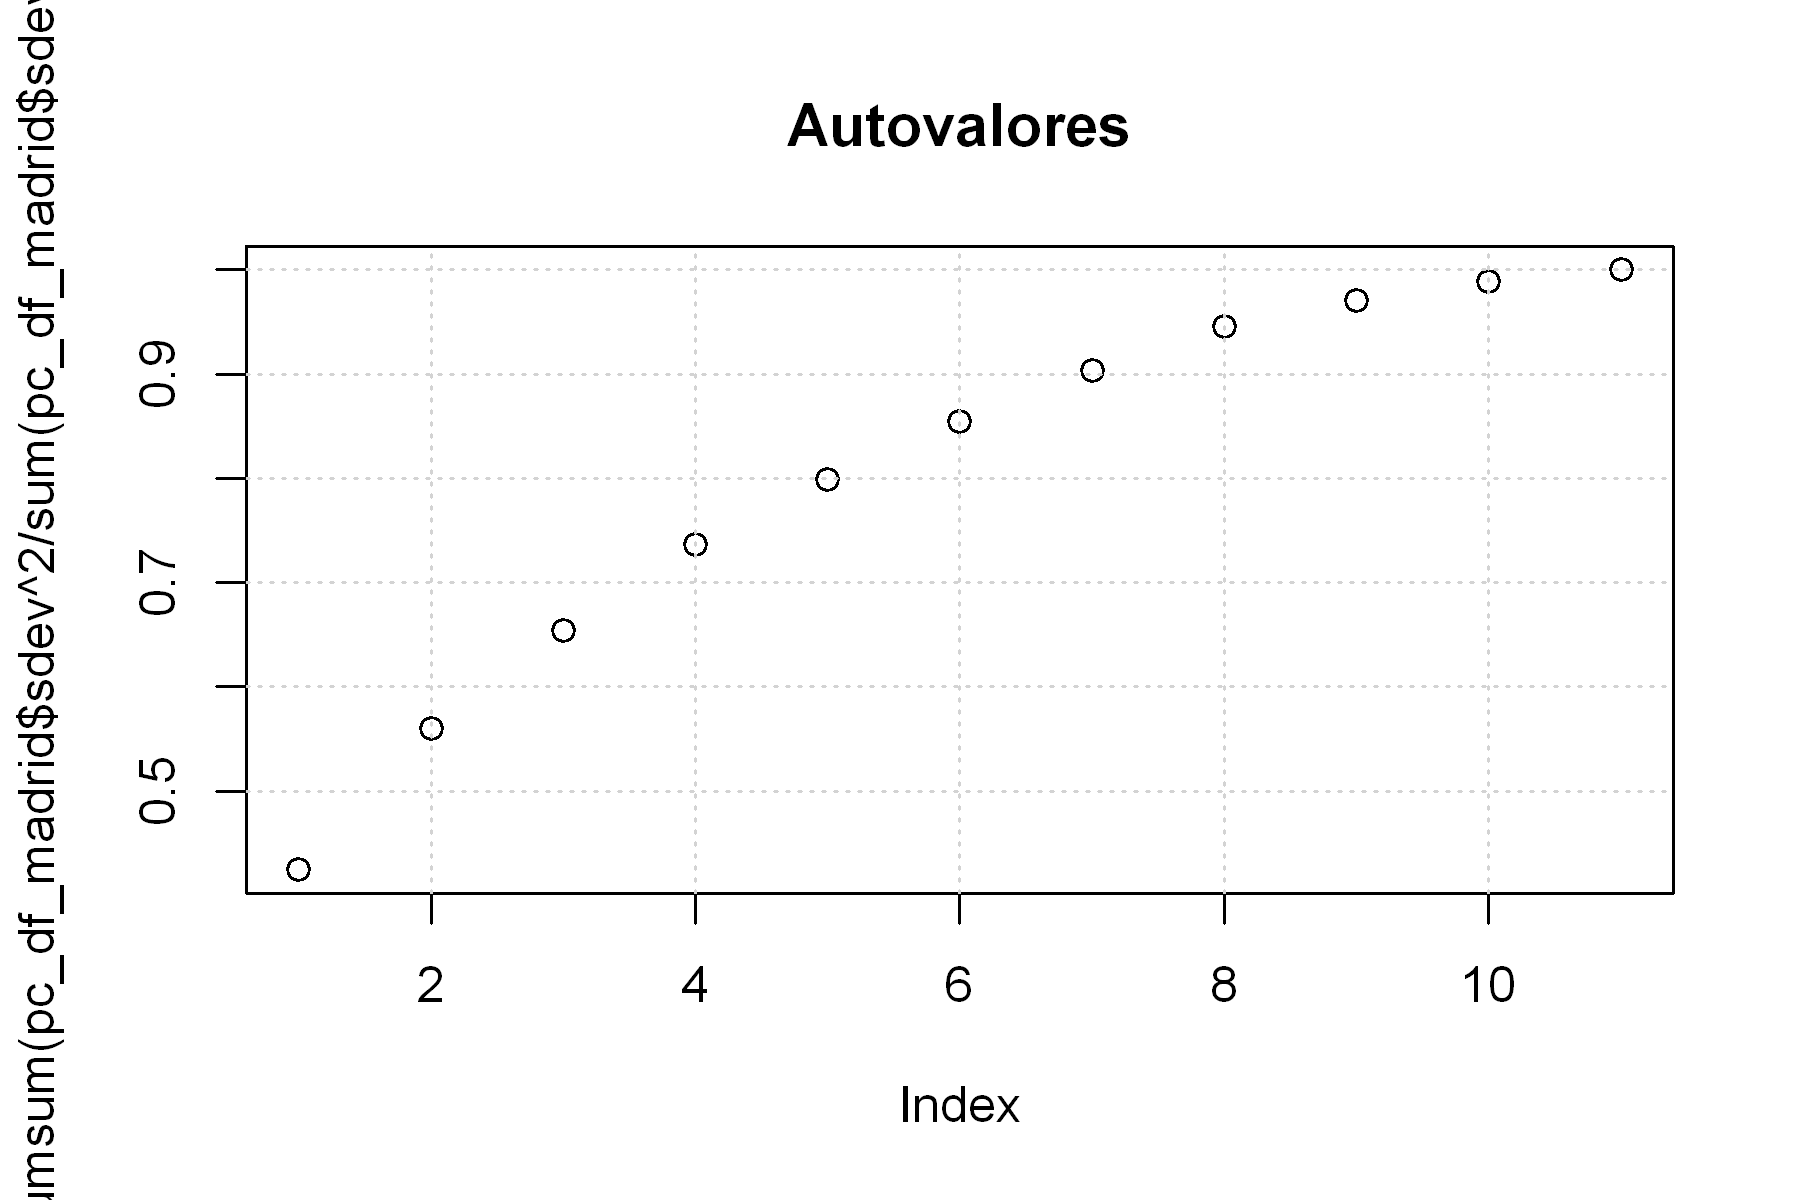

In [315]:
#calculo el pca para el dataset completo
pc_df_madrid<-prcomp(na.omit(df_madrid.tot) %>% ungroup() %>% dplyr:: select(-c(Neighbourhood,Square.Feet,neighb_id,pred)),center = TRUE, scale. = TRUE)
#evaluo los autovalores más significativos 
plot(cumsum(pc_df_madrid$sdev^2/sum(pc_df_madrid$sdev^2)),main="Autovalores")
grid()
summary(pc_df_madrid)
#los 7 primeros PC me dan el 90% de la varianza

In [316]:
#Convierto el dataframe del apartamento a dominio pca. 

pc_df_apartment<-predict(pc_df_madrid,newdata= df_apartment)
pc_df_apartment

pc_df_apartment[,1:7]

#pca_df_apartment<-predict(pc_df_madrid$x[,1:7],newdata= df_apartment)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
-1.560643,0.7695955,2.316172,-0.3088429,-0.3456162,0.2982362,1.004131,0.01667111,0.2191138,-0.143698,0.5226008


PC1        PC2        PC3        PC4        PC5        PC6        PC7 
-1.5606429  0.7695955  2.3161724 -0.3088429 -0.3456162  0.2982362  1.0041310

In [317]:
#compruebo la distancia euclídea de los primeros 7 componentes del apartamento con los demás. 
pca_df_apartment<-pc_df_apartment[,1:7]
#pca_df_apartment
pca_df_apartment<-matrix(pca_df_apartment[1:7],nrow=1)
apc<-pc_df_madrid$x[,1:7]

dist<- rowSums((pca_df_apartment[rep(1,times= nrow(apc)),]-apc)^2)

paste('Dist con 7 PC: ')
head(sort(dist),decreasing= F)

#dim(pca_df_apartment)
#pc_df_madrid
#dist1<- rowSums((pc_df_apartment[rep(1,times= nrow(pc_df_madrid$x)),]-pc_df_madrid$x)^2)
#paste('Dist con todos los PC')
#dist1

[1] "Dist con 7 PC: "

[1] 1.652504 1.681794 2.029745 2.172828 2.338444 2.349170

In [318]:
which.min(dist)
#which.min(dist1)
head(order(dist,decreasing = F),5)
#head(order(dist1,decreasing = F),5)



[1] 87

[1]  87 241 249 268 199

In [319]:
#creo un dataframe con los crecanos a mi df_apartment para compararlos mejor...
df_cercanos<-df_madrid.tot[c(head(order(dist,decreasing = F),5)),]
df_cercanos
df_apartment

#df_cercanos<-df_madrid.tot[c(152,306,114,306,120),]

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Meters,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Feet,neighb_id,pred
Cortes,2,1.0,1,2,60,35.02443,2,0,92,40.41528,-3.698587,377,1,37.02818
La Latina,2,1.0,1,1,81,38.88414,2,10,93,40.41359,-3.708945,NA,1,38.88414
Malasaña,6,2.5,3,3,314,116.38629,2,26,NA,40.42201,-3.707045,NA,1,116.38629
Recoletos,2,1.0,0,2,49,22.51586,1,0,91,40.42820,-3.686709,NA,1,22.51586
Justicia,2,1.0,1,1,85,39.23766,1,0,80,40.42012,-3.698330,NA,1,39.23766


Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
2,1,1,1,76,2,11,68,40.42115,-3.698723,38.44224


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?